# Classify Handwritten Digits with Tensoflow


## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing Dataset

In [3]:
import tensorflow as tf
df = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = df.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

## 3. View Data

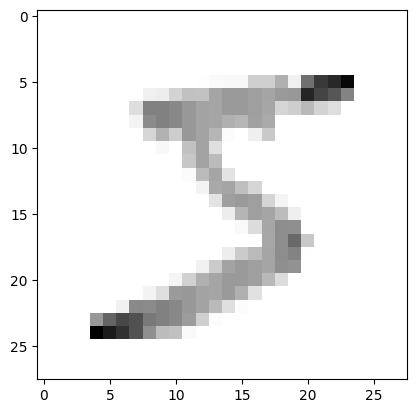

In [7]:
def display(x):
    plt.imshow(x, cmap=plt.cm.binary)
    plt.show()

display(X_train[0])

## 4. Build and Fit the Model

In [8]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape= (28, 28))),

model.add(tf.keras.layers.Dense(128, activation='relu')),
model.add(tf.keras.layers.Dense(128, activation='relu')),
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=3)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8696 - loss: 0.4639
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9649 - loss: 0.1135
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9774 - loss: 0.0730


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 354,848 (1.35 MB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 236,566 (924.09 KB)

## 5. Model Evaluation 

In [10]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9629 - loss: 0.1234


[0.10449864715337753, 0.9670000076293945]

## 6. Prediction

In [15]:
y_pred = model.predict([X_test])
np.argmax(y_pred[2]), y_test[2]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(np.int64(1), np.uint8(1))

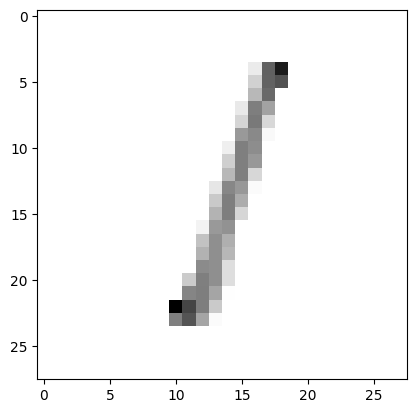

In [13]:
display(X_test[2])

## 7. Saving and Testing Model

In [17]:
# Saving Model
model.save('handwritten.h5')

In [18]:
# Loading Model
new_model = tf.keras.models.load_model('handwritten.h5')

In [21]:
# Prediction with New Model
new_y_pred = new_model.predict([X_test])
y_test[2], np.argmax(new_y_pred[2])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(np.uint8(1), np.int64(1))

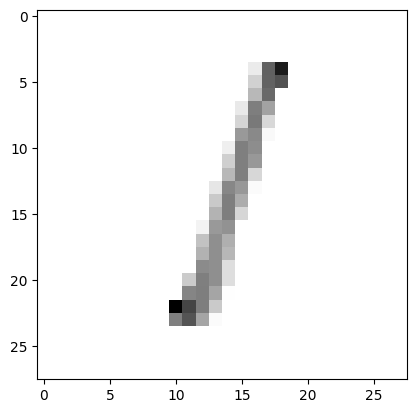

In [23]:
display(X_test[2])

In [30]:
from sklearn.metrics import accuracy_score
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy_score(y_test, y_pred_labels)

0.967

In [31]:
new_y_pred_labels = np.argmax(new_y_pred, axis=1)
accuracy_score(y_test, new_y_pred_labels)

0.967